**<h1><center>Lab-7-Report </center></h1>**

**<h1><center>EE5175: Image Signal Processing </center></h1>**


<h4><center>Under the guidence of </center></h4>
<h4><center>Prof. AN.Rajagopalan </center></h4>

<center>By EE21S048</center>

<h9>Date of submission: 20-03-2022<h9>

##**DFT Properties**
---

**Import the libraries:**

In [32]:
from numpy import *
import sys
import cv2
import math
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft

**Read and display the images:**

340 280
340 280
82 82


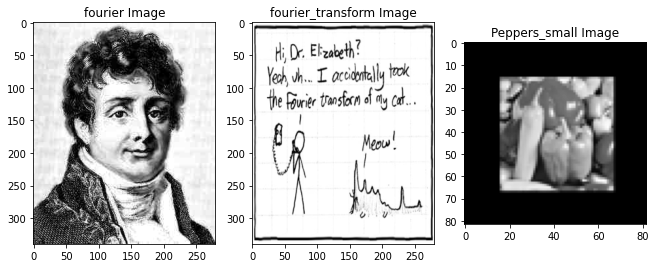

In [33]:
img1= cv2.imread("fourier.pgm",0)
width1, height1= img1.shape    
print(width1, height1)

img2= cv2.imread("fourier_transform.pgm",0)
width2,height2= img2.shape  
print(width2, height2)

img3= cv2.imread("peppers_small.pgm",0)
width3,height3= img3.shape  
print(width3, height3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,12), constrained_layout=True)
ax1.imshow(img1,'gray')                #displaying gray scale image
ax1.title.set_text("fourier Image")     #setting title to the figure
ax2.imshow(img2,'gray')       
ax2.title.set_text("fourier_transform Image")
ax3.imshow(img3,'gray')       
ax3.title.set_text("Peppers_small Image")

**Q1: Implement 2D DFT using row-column decomposition.**

##**2D-DFT Function:**

In [34]:
def dft(img):

  width, height=img.shape       # get the shape of the image
  r_d= fft(img,axis=1)          # perform row transform
  dft_img= fft(r_d,axis=0)      # perform column transform
  dft_img= fftshift(dft_img)    # fftshift to center the resulting DFT
  mag =abs(dft_img)             # get the magnitude and phase
  phase =zeros((width, height))
  phase[mag!=0] = dft_img[mag!=0]/mag[mag!=0]
  mag=mag/(sqrt(width*height))  # normalize the magnitude to ensure the transform is unitary

  return mag,phase

##**2D-IDFT Function:**

In [35]:
def idft(mag, phase, shift_first=True):
    dft = mag*phase
    m, n = dft.shape
    if shift_first:
        dft = fftshift(dft)
    r_d= fft(dft, axis=1)        # perform 2D DFT on the DFT
    idft_img= fft(r_d, axis=0)
    if not shift_first:
        idft_img= fftshift(idft_img)
    mag=abs(idft_img)
    mag=mag[::-1, ::-1]
    mag=mag/(sqrt(m*n))          # normalize
    return mag

**Finding DFT of Img1 and Img2:**

In [51]:
dft_img1=dft(img1)
dft_img2=dft(img2)
#print(dft_img2[0].shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


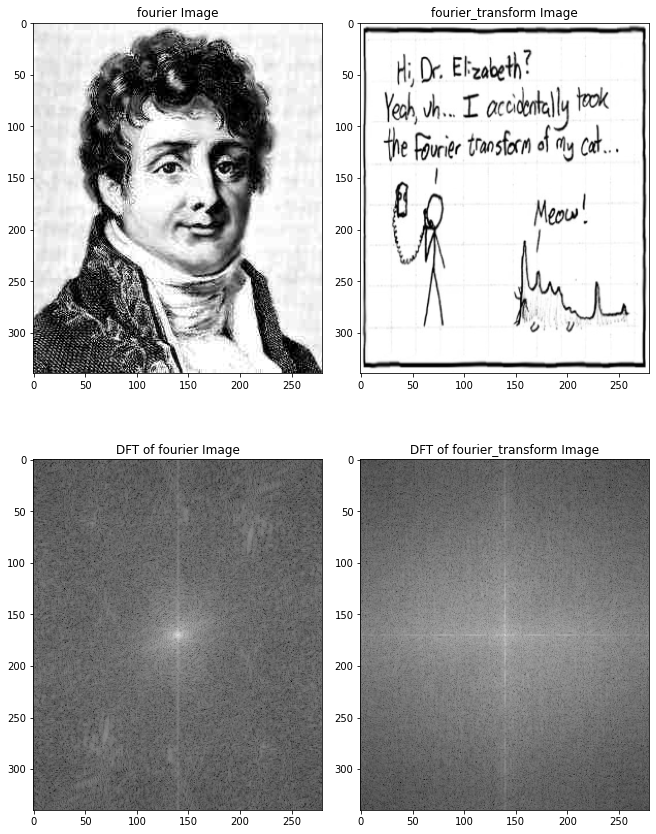

In [37]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img1,'gray')                
ax1.title.set_text("fourier Image")    
ax2.imshow(img2,'gray')       
ax2.title.set_text("fourier_transform Image")
ax3.imshow(log10(dft_img1[0]),'gray')                
ax3.title.set_text("DFT of fourier Image")    
ax4.imshow(log10(dft_img2[0]),'gray')       
ax4.title.set_text("DFT of fourier_transform Image")

#**Q2: Phase Dominance of DFT**
---

*   Consider the given two images $Img_{1}$ and $Img_{2}$.
*   Calculate the DFTs as $F_{1}=\left|F_{1}\right| e^{j \Phi_{1}}$ and $F_{2}=\left|F_{2}\right| e^{j \Phi_{2}}$ respectively. 
*   Now swith the magnitudes and phases to get two new images $mix\_img_{1}$ and $mix\_img_{2}$ by taking their DFTs as $F_{3}=\left|F_{1}\right| e^{j \Phi_{2}}$ and $F_{4}=\left|F_{2}\right| e^{j \Phi_{1}}$ , respectively.




In [38]:
mix_img1 = idft(dft_img1[0],dft_img2[1])
mix_img2= idft(dft_img2[0],dft_img1[1])

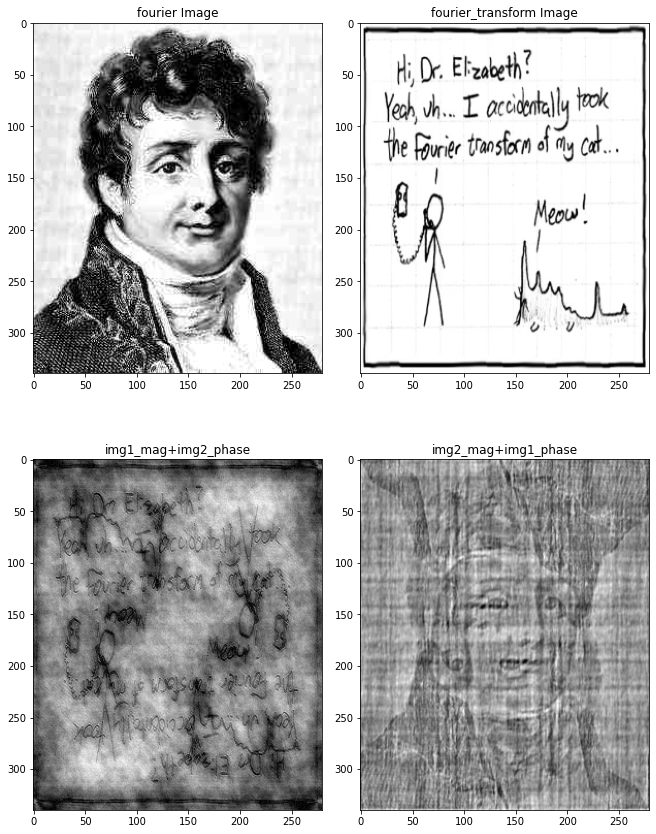

In [49]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img1,'gray')                
ax1.title.set_text("fourier Image")    
ax2.imshow(img2,'gray')       
ax2.title.set_text("fourier_transform Image")
ax3.imshow(mix_img1,'gray')                
ax3.title.set_text("img1_mag+img2_phase")    
ax4.imshow(mix_img2,'gray')       
ax4.title.set_text("img2_mag+img1_phase")

* From the results, we can see that the images depend mostly on the phase component of the DFT compared to the magnitude component.

#**Q3: Rotation Property of DFT:**

In [40]:
theta = 45
theta_r=pi*theta/180             #converting from degrees to radians
    
img_padded= zeros((width3+2, height3+2)) 
img_padded[1:-1, 1:-1] = img3           
img_r=zeros((width3, height3))

for xt in range(width3): 
  for yt in range(height3):
      xs = cos(theta_r)*(xt-width3/2) - sin(theta_r)*(yt-height3/2) + width3/2
      ys = sin(theta_r)*(xt-width3/2) + cos(theta_r)*(yt-height3/2) + height3/2
      x=xs+1
      y=ys+1
      xs1=math.floor(x)
      ys1=math.floor(y)
      a=x-xs1
      b=y-ys1
      if xs1>=0 and xs1<=width3 and ys1>=0 and ys1<=height3:
        img_r[xt,yt]=(1-a)*(1-b)*img_padded[xs1,ys1]+(1-a)*b*img_padded[xs1,ys1+1]+a*(1-b)*img_padded[xs1+1,ys1]+a*b*img_padded[xs1+1,ys1+1]
      else:
        img_r[xt,yt]=0


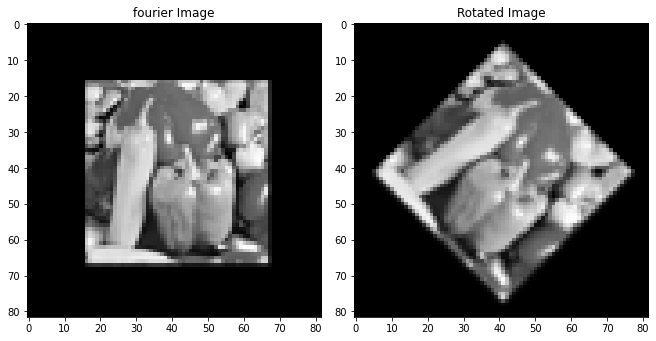

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img3,'gray')                #displaying gray scale image
ax1.title.set_text("fourier Image")     #setting title to the figure
ax2.imshow(img_r,'gray')       
ax2.title.set_text("Rotated Image")

In [42]:
img3_dft= dft(img_r)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


* Compute rotated (such that the image center is the origin) form of 2D DFT as
$$
F(k, l)=\Sigma_{m} \Sigma_{n} f(m, n) e^{-j 2 \pi m^{T} R k}
$$
where
$$
\begin{gathered}
\bar{m}=\left[\begin{array}{ll}
m \\ n
\end{array}\right] \\
\end{gathered}
$$
* Compute DFT in a way such that the image coordinates at the center are considered the origin.
$$
\bar{k}=\left[\begin{array}{ll}
\frac{k-\frac{M}{2}}{M} \\ \frac{l-\frac{N}{2}}{N}
\end{array}\right]
$$
and
$$
R=\left[\begin{array}{cc}
\cos (\theta) & -\sin (\theta) \\
\sin (\theta) & \cos (\theta)
\end{array}\right]
$$
 

In [43]:
def rotated_DFT(image, theta):

    theta=theta*pi/180
    R =array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    
    x, y = shape(image)
    F = zeros((x, y), dtype=complex)
    X, Y = meshgrid(arange(x), arange(y))        # use meshgrid for vectorized operations
    x_c = x//2                                   # get the image center
    y_c = y//2

    # m_vec to calculate the sum mentioned in the RHS above in one go
    m_vec =hstack((X.reshape(-1, 1)-x_c, Y.reshape(-1, 1)-y_c))
    for i in range(x):
        for j in range(y):

            k_vec = array([(i-x_c)/x, (j-y_c)/y])
            k_vec = (R@k_vec)                      # perform vectorized multiplication
            vals = m_vec@k_vec
            vals = (vals.reshape(y, x)).T          # reshape to get the shape of image
            F[i, j] = sum(image*exp(-2j*pi*(vals)))

    mag = abs(F)
    phase = F/mag
    mag=mag/sqrt(x*y)                              # Normalize the magnitude so that the transform is unitary
    
    return mag, phase

In [44]:
img3_rdft= rotated_DFT(img3, theta)
rotated_im_peppers_using_dft = idft(img3_rdft[0],img3_rdft[1], shift_first=False)

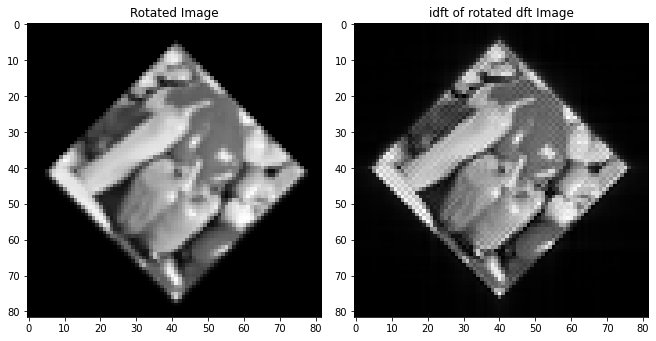

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img_r,'gray')                #displaying gray scale image
ax1.title.set_text("Rotated Image")     #setting title to the figure
ax2.imshow(rotated_im_peppers_using_dft,'gray')       
ax2.title.set_text("idft of rotated dft Image")

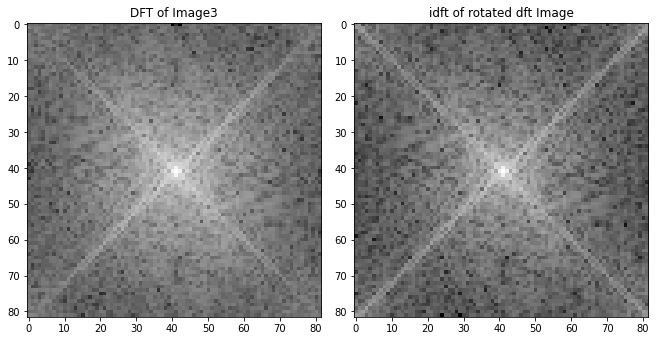

In [46]:
#log10(img3_dft[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(log10(img3_dft[0]),'gray')                #displaying gray scale image
ax1.title.set_text("DFT of Image3")     #setting title to the figure
ax2.imshow(log10(img3_rdft[0]),'gray')       
ax2.title.set_text("idft of rotated dft Image")      

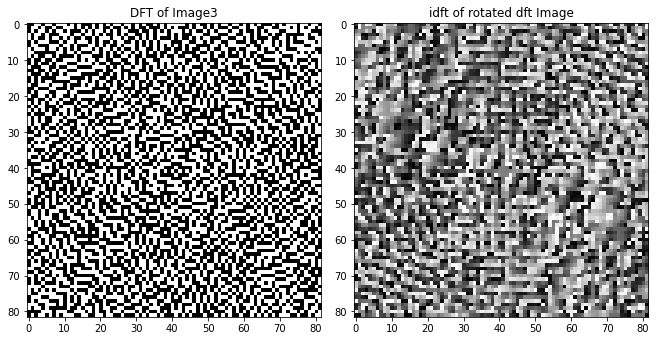

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(angle(img3_dft[1]),'gray')                #displaying gray scale image
ax1.title.set_text("DFT of Image3")     #setting title to the figure
ax2.imshow(angle(img3_rdft[1]),'gray')       
ax2.title.set_text("idft of rotated dft Image")  

##**Conclusion:**
* On calculating the DFTs for two images, swapping their magnitudes and phases, and then taking their IDFT, the resulting images look much closer to the image whose phase component they contain compared to the magnitude component.
* **Rotating an image in the spatial domain** or **Rotating the DFT and then taking its IDFT** results in almost identical looking images.we see almost similar results except some small deviations at higher frequencies but the phases look different.
* The spatial domain rotation uses bilinear interpolation, resulting in a smoother image than that obtained from rotating the DFT and taking its IDFT.
* The energy of all the images is mostly concentrated in a few pixels at the origin.